# Read PNBOIA netCDF file from THREDDS server
- Henrique P P Pereira

In [39]:
import netCDF4 as nc
import matplotlib.pylab as pl
import numpy as np
import pandas as pd
import os
%matplotlib inline

In [52]:
#choose the buoy
buoy = 'rig'
print (buoy)
summary = nc.Dataset('http://remo.atmosmarine.com:8080/thredds/dodsC/PNBOIA/' + buoy + '_summary.nc')
atm = nc.Dataset('http://remo.atmosmarine.com:8080/thredds/dodsC/PNBOIA/' + buoy + '_atm8.nc')
hne = nc.Dataset('http://remo.atmosmarine.com:8080/thredds/dodsC/PNBOIA/' + buoy + '_hne.nc')

print (summary.variables.keys())
print (atm.variables.keys())
print (hne.variables.keys())

rig
[u'date', u'depth', u'lat', u'lon', u'year', u'julian_date', u'zero_crossings', u'ave_ht', u'ave_per', u'max_ht', u'sig_wave', u'sig_per', u'peak_per', u'peak_per_read', u'hm0', u'mean_theta', u'sigma_theta', u'h_10', u'th1_10', u'mean_per']
[u'date', u'depth', u'lat', u'lon', u'hm0', u'tp', u'dp', u'hs', u'h10', u'hmax', u'thmax', u'tmed', u'tzamax']
[u'date', u'lat', u'lon', u'heave', u'dspns', u'dspew']


In [56]:
date_units = 'hours since 0001-01-01 00:00:00.0'
date_calendar = 'gregorian'

df1 = pd.DataFrame(np.array([summary['hm0'][:], summary['mean_per'][:], summary['mean_theta'][:]]).T,
                   index=nc.num2date(summary['date'][:], units = date_units, calendar = date_calendar),
                   columns=['hm0','tp','dp'])
df1.index.name = 'date'

df2 = pd.DataFrame(np.array([atm['hm0'][:], atm['tp'][:], atm['dp'][:]]).T,
                   index=nc.num2date(atm['date'][:], units = date_units, calendar = date_calendar),
                   columns=['hm0','tp','dp'])
df2.index.name = 'date'

In [49]:

a.index


DatetimeIndex([       '2008-12-01 00:00:00',        '2008-12-01 00:00:00',
               '2008-12-01 02:00:00.000006',        '2008-12-01 04:00:00',
                      '2008-12-01 04:00:00',        '2008-12-01 06:00:00',
                      '2008-12-01 06:00:00',        '2008-12-01 06:00:00',
               '2008-12-01 08:00:00.000006', '2008-12-01 08:00:00.000006',
               ...
               '2013-01-22 08:00:00.000006', '2013-01-22 08:00:00.000006',
                      '2013-01-22 10:00:00',        '2013-01-22 12:00:00',
                      '2013-01-22 12:00:00',        '2013-01-22 12:00:00',
               '2013-01-22 14:00:00.000006',        '2013-01-22 16:00:00',
                      '2013-01-22 16:00:00',        '2013-01-22 18:00:00'],
              dtype='datetime64[ns]', name=u'date', length=16782, freq=None)

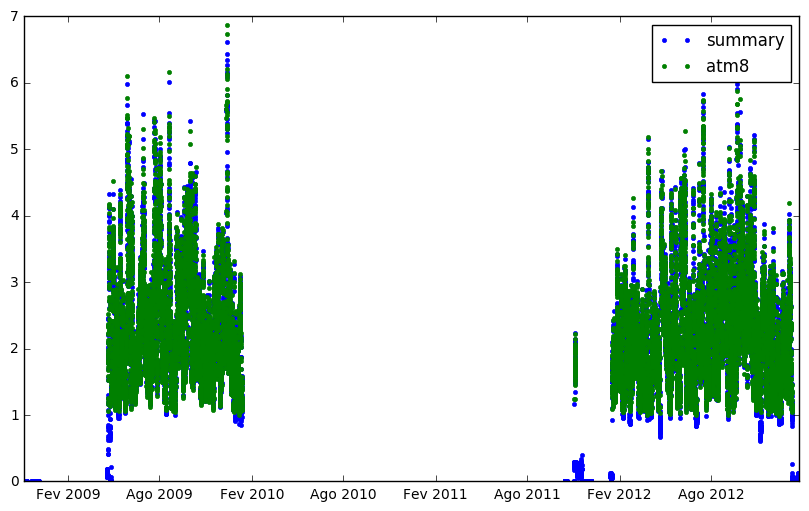

In [29]:
pl.figure(figsize=(10,6))
pl.plot(date1, hm01, '.', date2, hm02, '.')
pl.legend(['summary', 'atm8'])
pl.xlim()
pl.show()